Base usada = https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [78]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [79]:
df = pd.read_csv('/content/seattle-weather.csv')

In [80]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [82]:
df = df.drop(['date'], axis=1)
df = df.drop(['weather'], axis=1)

In [83]:
df.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


#Correlação

In [84]:
df.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [85]:
correlacao = df.corr()

<Axes: >

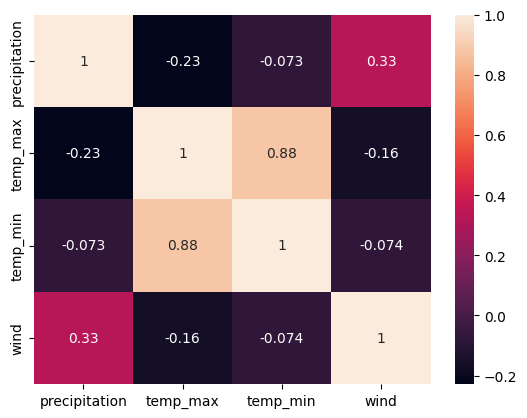

In [86]:
sns.heatmap(df.corr(), annot=True)

#Modelo de Regressão Linear

In [87]:
reglin = LinearRegression()

In [88]:
# Treinar o modelo usando as variáveis numéricas para prever 'weather_encoded'
reglin.fit(df[['temp_max', 'temp_min', 'wind',]], df['precipitation'])

# Avaliação opcional: Imprimir os coeficientes para ver como cada variável está influenciando o clima
print("Coeficientes:", reglin.coef_)
print("Intercepto:", reglin.intercept_)

Coeficientes: [-0.53969313  0.62098141  1.23024723]
Intercepto: 2.8004536137318334


In [89]:
import statsmodels.api as sm

In [92]:
stats = sm.add_constant(df[['temp_max', 'temp_min', 'wind',]])

In [93]:
rl = sm.OLS(df['precipitation'], stats).fit()

In [95]:
print(rl.summary())

                            OLS Regression Results                            
Dep. Variable:          precipitation   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     112.9
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           9.67e-66
Time:                        01:19:15   Log-Likelihood:                -4694.5
No. Observations:                1461   AIC:                             9397.
Df Residuals:                    1457   BIC:                             9418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8005      0.594      4.713      0.0

## Previsão de precipitação

In [96]:
def prever_tempo(temp_max, temp_min, wind):
  precipitacao = reglin.coef_[0] * temp_max + reglin.coef_[1] * temp_min + reglin.coef_[2] * wind + reglin.intercept_
  return precipitacao

In [103]:
prever_tempo(15, 7, 9)

10.124151580979927

In [107]:
print('Dia ensolarado:', prever_tempo(32, 20, 2))
print('Dia nublado:', prever_tempo(22, 13, 8))
print('Dia frio:', prever_tempo(12, 7, 10))


Dia ensolarado: 0.4103960752674092
Dia nublado: 8.84194089403168
Dia frio: 12.973478205045911


In [98]:
prev_teste = reglin.predict(df[['temp_max', 'temp_min', 'wind']])
prev_teste

array([4.77945056, 4.3545669 , 3.78667876, ..., 2.48589471, 3.34003125,
       2.77997642])

## Análise do modelo

In [104]:
r2_score(df['precipitation'], prev_teste)

0.188639082829691

In [100]:
mse = mean_squared_error(df['precipitation'], prev_teste)
mse

36.182195506789746

In [101]:
print("MSE", mse)
print("RMSE", mse ** 0.5)

MSE 36.182195506789746
RMSE 6.015163797170427


## Considerações:

Identificamos que existe uma correlação entre as váriaveis temperatura máxima, temperatura mínima e vento em relação a precipitação de chuva.

A temperatura máxima tem uma relação inversamente proporcional à precipitação. Temperatura mínima é razoavelmente positiva em relação a variável target. Vento é a variável com maior correlação identificada.

Criamos um modelo simulando diferentes cenários. Dia ensolarado quente, dia nublado, estável e um dia frio, chuvoso.

Conforme resultados abaixo nota-se a relação entre as variaveis dependentes e independentes.

Dia ensolarado: 0.41.

Dia nublado: 8.84.

Dia frio: 12.97.

No dia frio, o modelo é capaz de prever maior expectativa de chuva.

Utilizamos o heatmap para visualizar melhor as correlações e as influências sobre a precipitação.